# Selekcja atrybutów - LASSO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

Przećwiczymy na znanych danych danych reklamowych, obejmujących sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [2]:
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
print(df_adv.head())
scaler = StandardScaler()
X = df_adv[['TV', 'radio','newspaper']]
X = scaler.fit_transform(X)
y = df_adv['sales']
y = scaler.fit_transform(y.values.reshape(-1,1))
print(X[:6,:])
print(X.sum(axis=0))
print(X.var(axis=0))



      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]
 [-1.61540845  1.73103399  2.04592999]]
[  2.44249065e-14  -9.05941988e-14   4.44089210e-14]
[ 1.  1.  1.]


In [3]:
X.shape, y.shape, y.squeeze().shape

((200, 3), (200, 1), (200,))

In [4]:
alphas, active, coefs = linear_model.lars_path(X, y.squeeze(), method='lasso', verbose=True)

print(alphas)

print(coefs.shape)
print(coefs[:,0])
print(coefs[:,1])

print(coefs[:,-1])

print(alphas)
print(-np.log1p(alphas))


.[ 0.78222442  0.56427718  0.00272176  0.        ]
(3, 4)
[ 0.  0.  0.]
[ 0.21794725  0.          0.        ]
[ 0.75306591  0.53648155 -0.00433069]
[ 0.78222442  0.56427718  0.00272176  0.        ]
[-0.57786226 -0.44742385 -0.00271806 -0.        ]


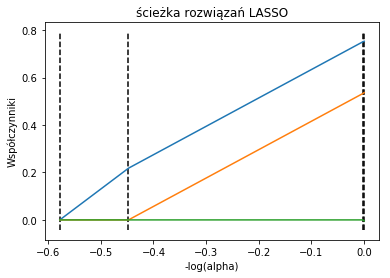

In [5]:
# co krok
#x_plot = np.arange(len(alphas))

# -log(alpha)
x_plot = -np.log1p(alphas)

# współczynniki
#x_plot = np.sum(np.abs(coefs.T), axis=1)
#x_plot /= x_plot[-1]

## alpha
#x_plot = -alphas

plt.plot(x_plot, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(x_plot, ymin, ymax, linestyle='dashed')
#plt.xlabel('|coef| / max|coef|')
plt.xlabel('-log(alpha)')
#plt.xlabel('step')
#plt.label('-alpha')
plt.ylabel('Współczynniki')
plt.title('ścieżka rozwiązań LASSO')
plt.show()


## Zadanie
Z repozytorium UCI https://archive.ics.uci.edu/ml/datasets.html pobierz zbiór dotyczący jakości wina:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Przyjmij zmienną <tt>alcohol</tt> jako predyktor i narysuj ścieżkę LASSO.